In [ ]:
/Users/maxime/IronHack/DAFT_NOV_21_01/module_1/Lab_32 Intro to Data Preparation/Copie de example_data_cleaning.xlsx

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Part 1 : Upload the data

In [4]:
file_url = '/Users/maxime/IronHack/DAFT_NOV_21_01/module_1/Lab_32 Intro to Data Preparation/Copie de example_data_cleaning.xlsx'
file_ori = pd.read_excel(file_url)
file = file_ori.copy() #copy of original

# Part 2 : Analyze your data and create a plan for data preparation

In [5]:
file.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013.0,12900,Student,78,Low
1,2,34983,2015.0,1230,barmen,78,High
2,3,34984,1945.0,3450,student,78,Medium
3,4,34985,1923.0,5670,manager,78,Low
4,5,34986,1978.0,7890,hr,78,High


In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  30 non-null     int64  
 1   ClientID       30 non-null     int64  
 2   BirthYear      28 non-null     float64
 3   Amount         30 non-null     int64  
 4   Profession     28 non-null     object 
 5   Department     30 non-null     int64  
 6   Risk           30 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.8+ KB


In [6]:
file.describe()

,TransactionID,ClientID,BirthYear,Amount,Department
count,30.000000,30.000000,28.000000,3.000000e+01,30.0
mean,15.500000,34993.833333,1968.316327,1.010097e+05,78.0
std,8.803408,8.132876,27.963867,4.342616e+05,0.0
min,1.000000,34982.000000,1923.000000,1.230000e+03,78.0
25%,8.250000,34987.250000,1944.714286,1.233000e+04,78.0
50%,15.500000,34991.500000,1967.000000,1.899000e+04,78.0
75%,22.750000,34999.750000,1988.000000,2.953500e+04,78.0
max,30.000000,35008.000000,2017.000000,2.399090e+06,78.0


In [ ]:
#drop columns
#missing values? -> drop rows? replace?
#mispellings?
#duplicates?
#outliers?
#encoding Risk and Profession column
#corr analysis

# Part 3: Data cleansing 

In [14]:
#drop column Department (no variation of value)
colToDrop = ['Department']

file.drop(colToDrop, axis=1, inplace=True)
file

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.000000,12900,Student,Low
1,2,34983,2015.000000,1230,barmen,High
2,3,34984,1945.000000,3450,student,Medium
3,4,34985,1923.000000,5670,manager,Low
4,5,34986,1978.000000,7890,hr,High
5,6,34987,1967.000000,10110,Manager,Medium
6,15,34987,1967.000000,30090,Manager,Low
7,22,34987,NaN,18990,sailer,High
8,7,34988,NaN,12330,Manager,Medium
9,23,34988,1999.000000,25650,Manager,Low


In [15]:
# missing values?
file.isna().sum()

TransactionID    0
ClientID         0
BirthYear        2
Amount           0
Profession       2
Risk             0
dtype: int64

In [16]:
# drop rows because nominal data, we can't approximate a value
file['BirthYear'].dropna(inplace=True)

In [17]:
file.dropna( axis=0, how='any', inplace=True)
file

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.000000,12900,Student,Low
1,2,34983,2015.000000,1230,barmen,High
2,3,34984,1945.000000,3450,student,Medium
3,4,34985,1923.000000,5670,manager,Low
4,5,34986,1978.000000,7890,hr,High
5,6,34987,1967.000000,10110,Manager,Medium
6,15,34987,1967.000000,30090,Manager,Low
9,23,34988,1999.000000,25650,Manager,Low
10,8,34989,1958.000000,14550,HR,High
11,24,34989,1967.000000,27870,HR,Medium


In [18]:
#misspellings?
file['Profession'].replace('Student','student',inplace=True)
file['Profession'].replace('etudient','student',inplace=True)
file['Profession'].replace('Manager','manager', inplace=True)
file['Profession'].replace('hr','HR', inplace=True)
file['Profession'].replace('bdm','BDM', inplace=True)
file['Profession'].replace('Manager','manager', inplace=True)


In [19]:
#check misspellings
file.sort_values(['Profession'], axis=0)

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
14,30,34991,1988.000000,55250,BDM,High
13,10,34991,1988.000000,18990,BDM,Low
27,27,35008,1967.000000,41930,BDM,Low
17,13,34994,2017.000000,25650,Driver,Medium
4,5,34986,1978.000000,7890,HR,High
10,8,34989,1958.000000,14550,HR,High
11,24,34989,1967.000000,27870,HR,Medium
25,25,35006,1923.000000,33050,HR,High
18,14,34995,1999.000000,27870,Hairdresser,Low
1,2,34983,2015.000000,1230,barmen,High


In [20]:
#duplicates 'Transaction ID'?
file.duplicated(subset=['TransactionID'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
dtype: bool

In [21]:
file.duplicated().any()

False

In [ ]:
#outliers?

In [22]:
file.describe()
# BirthYear 1923 and 2017

,TransactionID,ClientID,BirthYear,Amount
count,26.000000,26.000000,26.000000,2.600000e+01
mean,14.576923,34993.230769,1968.071429,1.116073e+05
std,8.419848,7.554112,29.017975,4.667288e+05
min,1.000000,34982.000000,1923.000000,1.230000e+03
25%,8.250000,34987.250000,1944.142857,1.066500e+04
50%,14.500000,34991.500000,1967.000000,1.788000e+04
75%,20.750000,34998.750000,1988.000000,2.787000e+04
max,30.000000,35008.000000,2017.000000,2.399090e+06


In [23]:
#identify outlier
filtered1 = file[(file['BirthYear']>2012)]
filtered1

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.0,12900,student,Low
1,2,34983,2015.0,1230,barmen,High
17,13,34994,2017.0,25650,Driver,Medium


<AxesSubplot:>

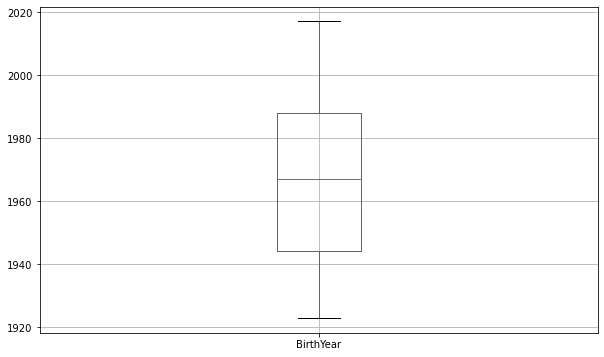

In [24]:
plt.figure(figsize=(10, 6))
file.boxplot(column=['BirthYear'])

<AxesSubplot:>

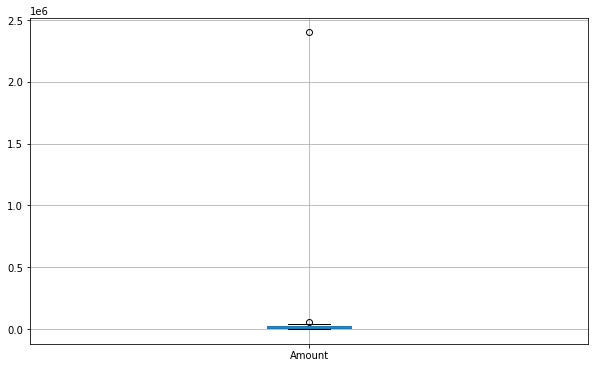

In [51]:
plt.figure(figsize=(10, 6))
file.boxplot(column=['Amount'])
#1 clear outlier of amount value

In [25]:
#identify outlier
filtered = file[(file['Amount']>100000)]
filtered

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
19,16,34997,1923.0,2399090,developer,High


# Part 4: Encode categorical data

In [27]:
# generate binary values using get_dummies
dum_file = pd.get_dummies(file, columns=['Profession','Risk'], prefix=['Profession_is', 'Risk_is'])

# Merge with main df file on key values
file_encoded = file.merge(dum_file, how='left')

# drop original profession and risk columns
file_encoded.drop(['Profession','Risk'], axis=1, inplace=True)
file_encoded.head()

,TransactionID,ClientID,BirthYear,Amount,Profession_is_BDM,Profession_is_Driver,Profession_is_HR,Profession_is_Hairdresser,Profession_is_barmen,Profession_is_developer,Profession_is_manager,Profession_is_professor,Profession_is_researcher,Profession_is_student,Risk_is_High,Risk_is_Low,Risk_is_Medium
0,1,34982,2013.0,12900,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,34983,2015.0,1230,0,0,0,0,1,0,0,0,0,0,1,0,0
2,3,34984,1945.0,3450,0,0,0,0,0,0,0,0,0,1,0,0,1
3,4,34985,1923.0,5670,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5,34986,1978.0,7890,0,0,1,0,0,0,0,0,0,0,1,0,0


# Part 5: Export prepared CSV dataset and upload to Github

In [28]:
file_encoded.to_csv('/Users/maxime/IronHack/DAFT_NOV_21_01/module_1/Lab_32 Intro to Data Preparation/file_prepared.csv', index=False)

In [56]:

#Analysis
# average amount by profession
avg_amount = file.groupby('Profession', as_index=False).agg({'Amount':'mean'})
avg_amount.sort_values('Amount')

,Profession,Amount
4,barmen,6.780000e+03
9,student,1.439833e+04
6,manager,1.751000e+04
2,HR,2.084000e+04
8,researcher,2.121000e+04
7,professor,2.343000e+04
1,Driver,2.565000e+04
3,Hairdresser,2.787000e+04
0,BDM,3.872333e+04
5,developer,2.399090e+06
